### To predict the percentage of an student based on the number of study hours.

In [105]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Dataset Information

The dataset is about the correspondance between the number of hours student has studied to scores obtained. This is a simple linear regression task as it involves just 2 variables. The dataset can also be downloaded from 'http://bit.ly/w-data'

In [106]:
#Importing the Data
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [107]:
# showcasing data to first five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [108]:
# statistical info
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [109]:
# datatype of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [110]:
# check unique values in dataset
data.apply(lambda x: len(x.unique()))

Hours     23
Scores    23
dtype: int64

### Preprocessing the dataset

In [111]:
# check for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data Analysis

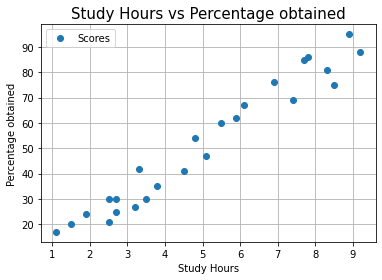

In [112]:
# Plotting the distribution of Study Hours vs Percentage obtained
data.plot(x="Hours",y="Scores",style='o')
plt.title('Study Hours vs Percentage obtained', size=15)
plt.xlabel("Study Hours")
plt.ylabel("Percentage obtained")
plt.grid()
plt.show()

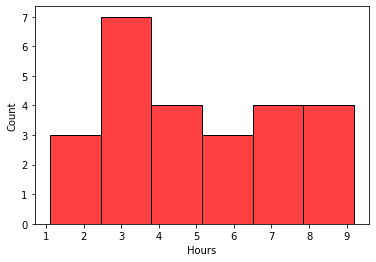

In [113]:
sns.histplot(data['Hours'],color='red');

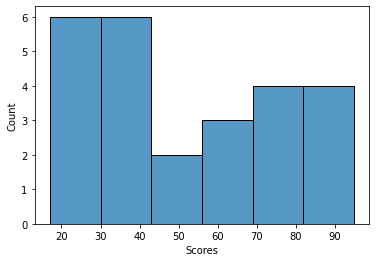

In [114]:
sns.histplot(data['Scores']);

### Coorelation Matrix

In [115]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

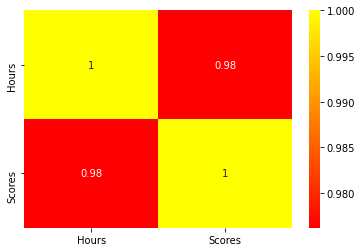

In [116]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='autumn')

### Observations

In [117]:
# It is observed in some cases that even with higher time spent on studing, the score is still less.
data[(data['Hours'] > 8) & (data['Scores'] < 80)]

,Hours,Scores
3,8.5,75


### Model Training

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
y = data['Scores'].values
print("Model Report for percentage of scores is:")
y

Model Report for percentage of scores is:


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [120]:
x = data['Hours'].values.reshape(-1,1)
print("Model Report for Study Hours is:")
x

Model Report for Study Hours is:


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10,test_size = 0.2)

In [122]:
# Importing LinearRegression 
from sklearn.linear_model import LinearRegression

### Trained Data Visualization & Prediction

In [123]:
train_reg = LinearRegression()

In [124]:
train_reg.fit(x_train,y_train)

LinearRegression()

In [125]:
print(train_reg.coef_)
print(train_reg.intercept_)

[9.81430544]
2.649965189403865


In [126]:
Model_train_prediction = train_reg.predict(x_train)

In [127]:
Model_train_prediction

array([75.27582547, 13.44570118, 56.62864513, 60.5543673 , 39.94432587,
       86.07156145, 70.36867275, 92.94157527, 62.51722839, 78.2201171 ,
       49.75863132, 79.20154764, 84.10870037, 29.14858989, 27.1857288 ,
       21.29714553, 27.1857288 , 89.99728363, 37.00003424, 29.14858989])

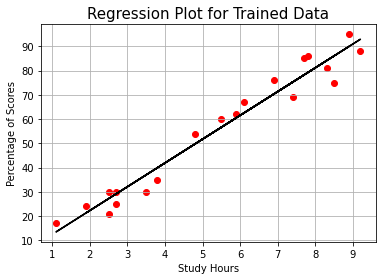

In [128]:
plt.scatter(x_train,y_train,color= 'r',marker = 'o')
plt.plot(x_train,train_pred,color='black')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Scores',)
plt.title('Regression Plot for Trained Data', size=15)
plt.grid()
plt.show()

In [129]:
# R Square Value for Trained Data Model
R_Square_value = train_reg.score(x_train,y_train)
R_Square_value

0.9580702244504199

### Tested Data Visualization & Prediction

In [130]:
Model_test_reg = LinearRegression()

In [131]:
Model_test_reg.fit(x_test,y_test)

LinearRegression()

In [132]:
Model_test_prediction = test_reg.predict(x_test)

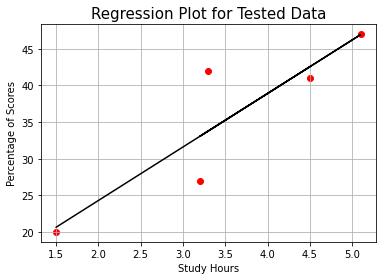

In [133]:
plt.scatter(x_test,y_test,color= 'r',marker = 'o')
plt.plot(x_test,test_pred,color='black')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Scores',)
plt.title('Regression Plot for Tested Data', size=15)
plt.grid()
plt.show()

### Original vs Predicted Data

In [134]:
df = pd.DataFrame({'Original': y_train, 'Predicted': train_pred})  
df

,Original,Predicted
0,69,75.275825
1,17,13.445701
2,60,56.628645
3,62,60.554367
4,35,39.944326
5,75,86.071561
6,76,70.368673
7,88,92.941575
8,67,62.517228
9,85,78.220117


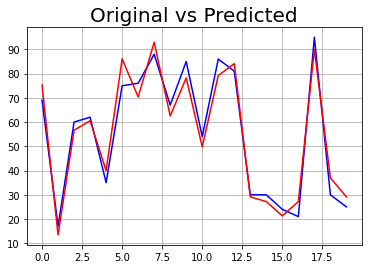

Original: Blue 
Predicted: Red


In [147]:
plt.plot(df['Original'],'b')
plt.plot(df['Predicted'],'r')
plt.title('Original vs Predicted', size=20)
plt.grid()
plt.show()
print("Original: Blue \nPredicted: Red")

In [136]:
# R Square Value for Tested Data Model
R_Square_value = test_reg.score(x_test,y_test)
R_Square_value

0.793199272799264

In [137]:
# Regression for original data
original_regression = LinearRegression()

In [138]:
original_regression.fit(x,y)

LinearRegression()

In [139]:
original_prediction = original_regression.predict(x)
original_prediction

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

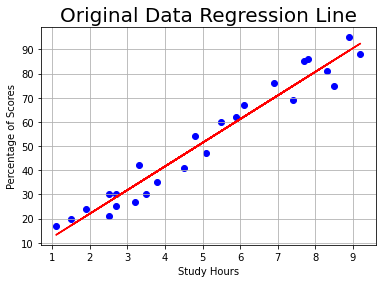

In [140]:
plt.scatter(x,y,color= 'b',marker = 'o')
plt.plot(x,o_pred,color='red')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Scores',)
plt.title('Original Data Regression Line', size=20)
plt.grid()
plt.show()

In [141]:
# R square value for original regression
R_Square_value = original_regression.score(x,y)
R_Square_value

0.9529481969048356

### Question - What will be predicted score if a student studies for 9.25 hrs/ day? 

In [142]:
predicted_score = original_regression.predict([[9.25]])

In [143]:
predicted_score

array([92.90985477])

Thus, for studing 9.25 hours per day, the predicted score is 92.90985477.